# Data Visualization 

[Lý thuyết](https://colab.research.google.com/drive/1QTllSyZpMa_7WcRWRNYpzkEnUM49NCbM?usp=sharing)

1. Vẽ biểu đồ cột cho neighborhood group
2. Tạo histogram cho neighbourhood
3. Biểu diễn mối liên hệ giữa neighbourgroup và Availability của các phòng
4. Vẽ bản đồ (scatter plot) của neighborhood dựa theo tọa độ lat lon
5. Sử dụng heatmap để biểu diễn mối quan hệ (correlation) giữa tất cả các thuộc tính trong dữ liệu


[Các câu lệnh xử lý dữ liệu với DataFrame trong Python](https://blog.hocexcel.online/68-dong-code-python-hay-su-dung-xu-ly-du-lieu-trong-pandas.html) 

In [85]:
# Đọc dữ liệu
import pandas as pd 

data = pd.read_csv('AB_NYC_2019.csv') 

data 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [86]:
# Kiểm tra có xuất hiện các giá trị NaN hay không
data.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Bài 1: Vẽ biểu đồ cột cho neighborhood group**

Cách 1: 

In [87]:
df1 = data 
neighbourhood_group_x = df1['neighbourhood_group'].unique()
neighbourhood_group_y = []
for neighbourhood_group in neighbourhood_group_x : 
    neighbourhood_group_statistic = df1[df1['neighbourhood_group'] == neighbourhood_group]
    neighbourhood_group_quantity = neighbourhood_group_statistic.shape[0] 
    neighbourhood_group_y.append(neighbourhood_group_quantity)

<BarContainer object of 5 artists>

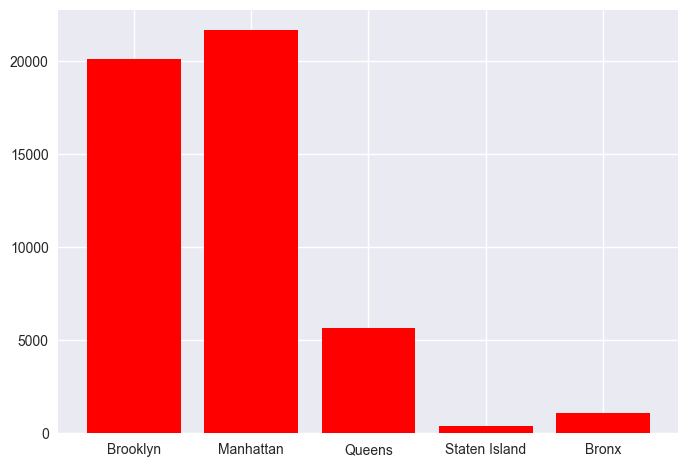

In [88]:
import matplotlib.pyplot as plt 
import numpy as np 

x = np.array(neighbourhood_group_x)
y = np.array(neighbourhood_group_y)

plt.bar(x,y, color = 'red')

Cách 2: 

In [89]:
neighbourhood_group = df1['neighbourhood_group'].value_counts()
neighbourhood_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<BarContainer object of 5 artists>

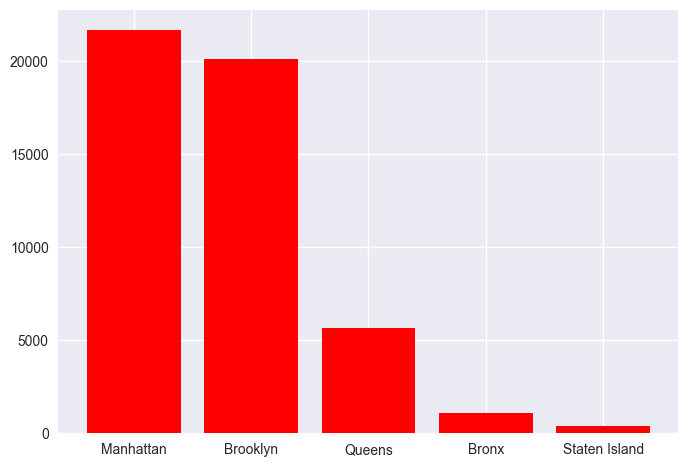

In [90]:
neighbourhood_group_x = neighbourhood_group.index.to_numpy()
neighbourhood_group_y = neighbourhood_group.to_numpy()

plt.bar(neighbourhood_group_x,neighbourhood_group_y, color = 'red')


**Bài 2: Tạo histogram cho neighbourhood**

In [91]:
df2 = data 
neighbourhood = df2['neighbourhood'].value_counts()
neighbourhood


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

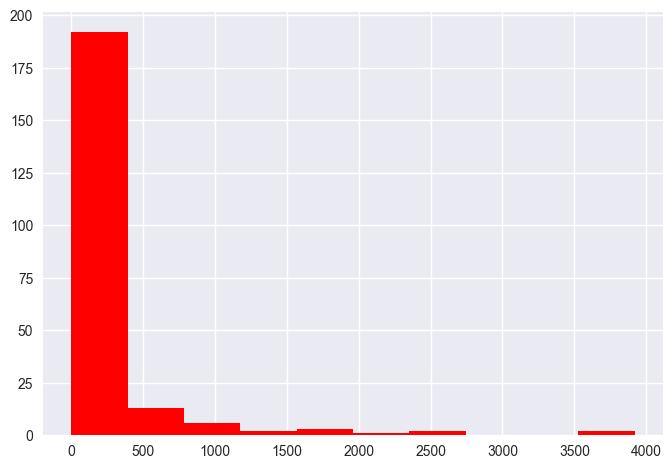

In [92]:
import matplotlib.pyplot as plt 
# biểu diễn thống kê số lượng của các vùng có số lượng phòng 
# trong khoảng từ bao nhiêu đến bao nhiêu 

# ví dụ : số lượng vùng có số lượng phòng từ 0 đến 500 
# là khoảng chưa đến 200 vùng
# từ 500 đến 1000 phòng là có khoảng chưa đến 25 và thấp hơn 

plt.hist(neighbourhood.to_numpy(), color='red') 

plt.show() 

**Bài 3: Biểu diễn mối liên hệ giữa neighbourgroup và Availability của các phòng**

In [93]:
df3 = data 
length = 200
df = pd.concat([df3['neighbourhood_group'],df3['availability_365']], axis=1)
df 

,neighbourhood_group,availability_365
0,Brooklyn,365
1,Manhattan,355
2,Manhattan,365
3,Brooklyn,194
4,Manhattan,0
...,...,...
48890,Brooklyn,9
48891,Brooklyn,36
48892,Manhattan,27
48893,Manhattan,2


In [94]:
neighbourhood_group = df3['neighbourhood_group'].head(length).to_numpy()
df3['neighbourhood_group'].head(length)

0       Brooklyn
1      Manhattan
2      Manhattan
3       Brooklyn
4      Manhattan
         ...    
195    Manhattan
196       Queens
197    Manhattan
198     Brooklyn
199       Queens
Name: neighbourhood_group, Length: 200, dtype: object

In [95]:
availability_365 = df3['availability_365'].head(length).to_numpy()
df3['availability_365'].head(length)

0      365
1      355
2      365
3      194
4        0
      ... 
195    328
196    365
197      0
198      0
199    240
Name: availability_365, Length: 200, dtype: int64

In [96]:
x = df3["id"].head(length).to_numpy()
df3["id"].head(length)

0       2539
1       2595
2       3647
3       3831
4       5022
       ...  
195    51572
196    51850
197    53137
198    53196
199    53469
Name: id, Length: 200, dtype: int64

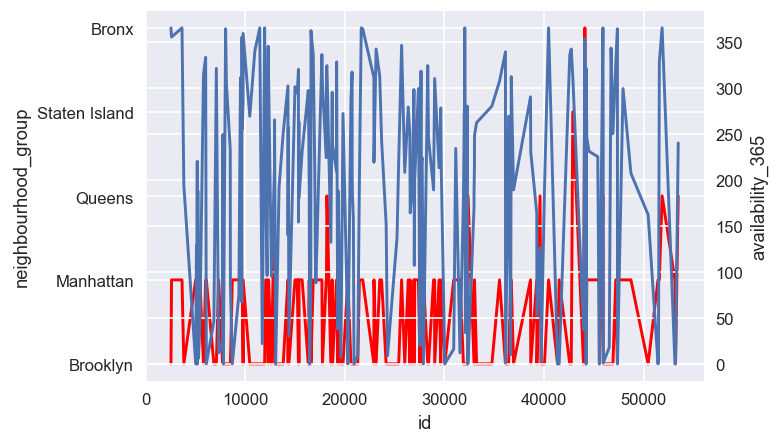

In [97]:
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots(1,1, figsize = (6,4), dpi = 120 )
ax1.plot(x,neighbourhood_group, color = 'red')

ax2 = ax1.twinx() 
ax2.plot(x,availability_365)

ax1.set_xlabel('id')
ax1.set_ylabel('neighbourhood_group')
ax2.set_ylabel('availability_365')

plt.show()

**Bài 4: Vẽ bản đồ (scatter plot) của neighborhood dựa theo tọa độ lat lon**

In [98]:
df4 = data 
latitude = df4['latitude']
longitude = df4['longitude']


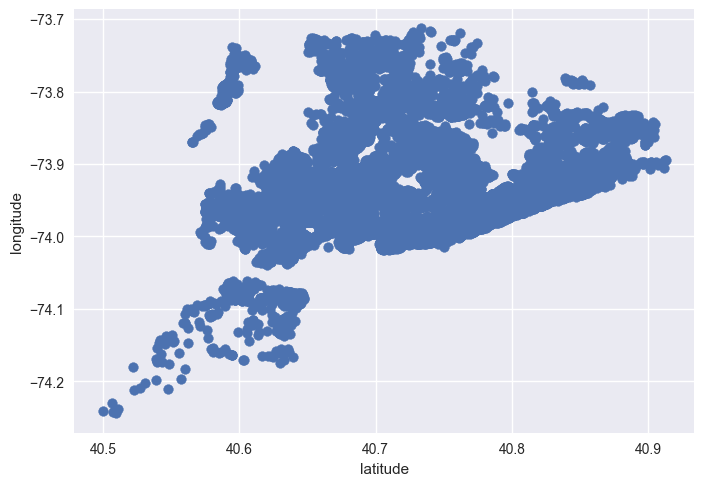

In [99]:
import matplotlib.pyplot as plt 
plt.scatter(latitude,longitude)
plt.savefig('Bai4')
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()
     

**Bài 5: Sử dụng heatmap để biểu diễn mối quan hệ (correlation) giữa tất cả các thuộc tính trong dữ liệu**

In [100]:
df5 = data 
df5.isna().sum()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [101]:
df_num = df5.select_dtypes(include=['int64', 'float'])
df_num = df_num.drop('reviews_per_month', axis=1)
df_num.isna().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [102]:
df_object = df5.select_dtypes(include='object')
df_object = df_object.drop('last_review', axis = 1)
df_object

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt
...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room


In [103]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

col_name = df_object.columns
for i in col_name : 
    print(i)

for i in col_name: 
    df_object[i] = encoder.fit_transform(df_object[i])

df_object.isna().sum()

name
host_name
neighbourhood_group
neighbourhood
room_type


name                   0
host_name              0
neighbourhood_group    0
neighbourhood          0
room_type              0
dtype: int64

In [104]:
df5 = pd.concat([df_num,df_object], axis=1)
df5

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,name,host_name,neighbourhood_group,neighbourhood,room_type
0,2539,2787,40.64749,-73.97237,149,1,9,6,365,12328,4989,1,108,1
1,2595,2845,40.75362,-73.98377,225,1,45,2,355,37455,4785,2,127,0
2,3647,4632,40.80902,-73.94190,150,3,0,1,365,43543,2909,2,94,1
3,3831,4869,40.68514,-73.95976,89,1,270,1,194,14783,6203,1,41,0
4,5022,7192,40.79851,-73.94399,80,10,9,1,0,18693,5923,2,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,2,9,11647,9051,1,13,1
48891,36485057,6570630,40.70184,-73.93317,40,4,0,2,36,3520,6776,1,28,1
48892,36485431,23492952,40.81475,-73.94867,115,10,0,1,27,42464,4263,2,94,0
48893,36485609,30985759,40.75751,-73.99112,55,1,0,6,2,2572,10190,2,95,2


In [105]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 

col_name = df5.columns

df5_scaler = scaler.fit_transform(df5)

df5_copy = pd.DataFrame(df5_scaler, columns=col_name)

df5_copy

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,name,host_name,neighbourhood_group,neighbourhood,room_type
0,0.000000,0.000001,0.357393,0.511921,0.0149,0.000000,0.014308,0.015337,1.000000,0.257343,0.435644,0.25,0.490909,0.5
1,0.000002,0.000001,0.614199,0.490469,0.0225,0.000000,0.071542,0.003067,0.972603,0.781860,0.417831,0.50,0.577273,0.0
2,0.000030,0.000008,0.748252,0.569257,0.0150,0.001601,0.000000,0.000000,1.000000,0.908945,0.254017,0.50,0.427273,0.5
3,0.000035,0.000009,0.448496,0.535649,0.0089,0.000000,0.429253,0.000000,0.531507,0.308590,0.541652,0.25,0.186364,0.0
4,0.000068,0.000017,0.722820,0.565324,0.0080,0.007206,0.014308,0.000000,0.000000,0.390210,0.517202,0.50,0.277273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0.999929,0.030002,0.432502,0.554109,0.0070,0.000801,0.000000,0.003067,0.024658,0.243127,0.790342,0.25,0.059091,0.5
48891,0.999940,0.023944,0.488906,0.585684,0.0040,0.002402,0.000000,0.003067,0.098630,0.073479,0.591687,0.25,0.127273,0.5
48892,0.999950,0.085632,0.762117,0.556517,0.0115,0.007206,0.000000,0.000000,0.073973,0.886421,0.372249,0.50,0.427273,0.0
48893,0.999955,0.112946,0.623612,0.476639,0.0055,0.000000,0.000000,0.015337,0.005479,0.053690,0.889801,0.50,0.431818,1.0


In [162]:
df6 = df5_copy.corr()
df6

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,name,host_name,neighbourhood_group,neighbourhood,room_type
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.133272,0.085468,0.018242,0.018920,0.062283,-0.033208,0.066020
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.154950,0.203492,0.010480,0.029933,0.113531,-0.028343,0.090451
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,0.019517,-0.010983,0.030420,-0.009377,0.279560,0.234793,0.006481
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,-0.114713,0.082731,-0.009255,0.008465,0.101171,-0.102381,0.184341
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,0.057472,0.081829,-0.006232,0.001298,0.044246,0.062057,-0.249350
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,0.127960,0.144303,0.007212,0.011971,0.017404,0.026000,-0.069792
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,-0.072376,0.172028,-0.002502,-0.012944,0.003853,-0.038342,0.002724
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,1.000000,0.225701,0.069429,0.060085,0.073671,0.010327,-0.106055
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.225701,1.000000,-0.008697,0.034578,0.080450,-0.034655,0.022500
name,0.018242,0.010480,0.030420,-0.009255,-0.006232,0.007212,-0.002502,0.069429,-0.008697,1.000000,0.015784,0.019513,0.055815,0.030224


<Axes: >

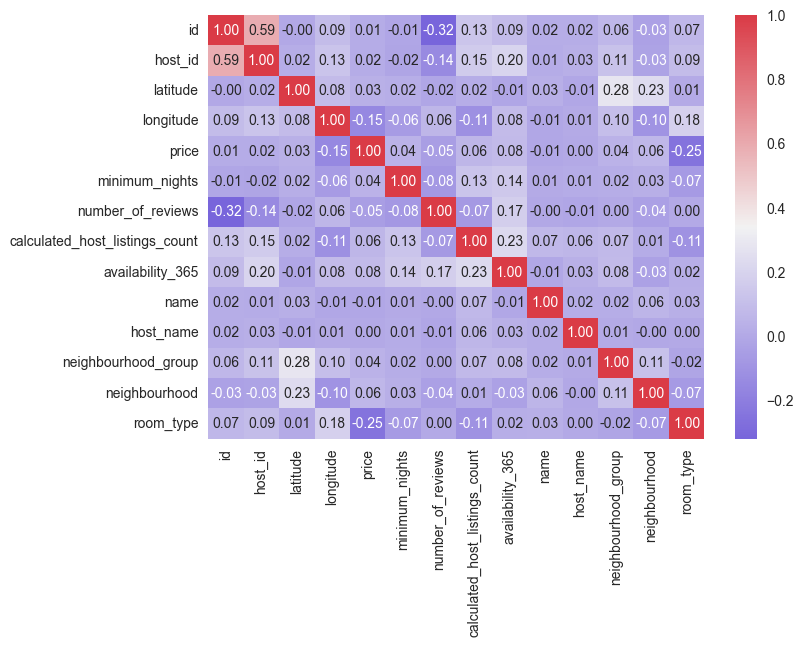

In [140]:
import seaborn as sns 
cmap = sns.diverging_palette(270, 10, as_cmap=True)
sns.heatmap(df6.head(14), cmap=cmap, annot = True ,fmt = '.2f')

In [149]:
df_copy = data 
df_copy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [163]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Dữ liệu kinh tuyến, vĩ tuyến và giá phòng
longitude = np.array(df_copy['longitude'])
latitude = np.array(df_copy['latitude'])
neighbourhood = np.array(df_copy['neighbourhood'])
room_price = np.array(df_copy['price'])

# Tạo đối tượng Scattermapbox và cung cấp nhãn (bao gồm cả giá phòng)
scatter_map = go.Scattermapbox(
    lat=latitude,
    lon=longitude,
    mode='markers',
    marker=dict(size=10),
    text=[f"{n}<br>Price: ${p}" for n, p in zip(neighbourhood, room_price)]
)

# Tạo đối tượng Layout
layout = go.Layout(
    mapbox=dict(
        center=dict(lat=65, lon=25),
        style='open-street-map',
        zoom=3
    ),
    showlegend=False
)

# Tạo đối tượng Figure
figure = go.Figure(data=[scatter_map], layout=layout)

# Cấu hình biểu đồ để hiển thị toàn màn hình
figure.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0),
    width=1920,
    height=1080
)

# Lưu biểu đồ vào tệp HTML
pio.write_html(figure, file='scatter_map.html', auto_open=True)
